In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


ISIC_BASE_PATH = "D:/studia/magistera/ISIC_2019"
ISIC_CSV_PATH = os.path.join(ISIC_BASE_PATH,"train", "merged", "ISIC2019.csv")   

data = pd.read_csv(ISIC_CSV_PATH)


print(data.info()) 
print(data.head())   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25331 entries, 0 to 25330
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   image                25331 non-null  object 
 1   age_approx           24894 non-null  float64
 2   anatom_site_general  22700 non-null  object 
 3   lesion_id            23247 non-null  object 
 4   sex                  24947 non-null  object 
 5   diagnostic           25331 non-null  object 
dtypes: float64(1), object(5)
memory usage: 1.2+ MB
None
          image  age_approx anatom_site_general lesion_id     sex diagnostic
0  ISIC_0000000        55.0      anterior torso       NaN  female         NV
1  ISIC_0000001        30.0      anterior torso       NaN  female         NV
2  ISIC_0000002        60.0     upper extremity       NaN  female        MEL
3  ISIC_0000003        30.0     upper extremity       NaN    male         NV
4  ISIC_0000004        80.0     posterior torso   

In [36]:

missing_data = data.isnull().sum()
missing_percentage = (missing_data / len(data)) * 100


categorical_cols = ['anatom_site_general', 'sex', 'diagnostic']
for col in categorical_cols:
    print(f"\nDistribution for {col}:")
    print(data[col].value_counts(normalize=True) * 100)


print("\nDistribution for 'age_approx':")
print(data['age_approx'].describe())


print("\nMissing data analysis:")
print(pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percentage}))



Distribution for anatom_site_general:
anatom_site_general
anterior torso     30.462555
lower extremity    21.982379
head/neck          20.207048
upper extremity    12.819383
posterior torso    12.277533
palms/soles         1.753304
oral/genital        0.259912
lateral torso       0.237885
Name: proportion, dtype: float64

Distribution for sex:
sex
male      53.256905
female    46.743095
Name: proportion, dtype: float64

Distribution for diagnostic:
diagnostic
NV      50.827050
MEL     17.851644
BCC     13.118314
BKL     10.358849
AK       3.422684
SCC      2.479176
VASC     0.998776
DF       0.943508
Name: proportion, dtype: float64

Distribution for 'age_approx':
count    24894.000000
mean        54.028481
std         18.130971
min          0.000000
25%         40.000000
50%         55.000000
75%         70.000000
max         85.000000
Name: age_approx, dtype: float64

Missing data analysis:
                     Missing Values  Percentage
image                             0    0.0000

1. Brakujące dane:
Kolumna age_approx ma 1.7% braków.
Kolumna anatom_site_general ma 10.4% braków.
Kolumna lesion_id ma 8.2% braków.
Kolumna image nie ma braków, co jest dobrą wiadomością, ponieważ jest to identyfikator obrazu.
2. Rozkład kolumn:
anatom_site_general: Największe proporcje mają obszary "anterior torso", "lower extremity" i "head/neck".
sex: Rozkład płci jest dość równy, z nieco większą liczbą mężczyzn.
diagnostic: Największy odsetek to "NV" (czyli niewielkie zmiany), a "MEL" (czerniak) stanowi 17.9% próby. Inne klasy, takie jak "BCC" (rak podstawnokomórkowy), "BKL" (brodawki skórne) itp., mają mniejsze udziały.
age_approx: Średni wiek to 54 lata, a rozkład jest dość szeroki, obejmując osoby w przedziale wiekowym od 0 do 85 lat.

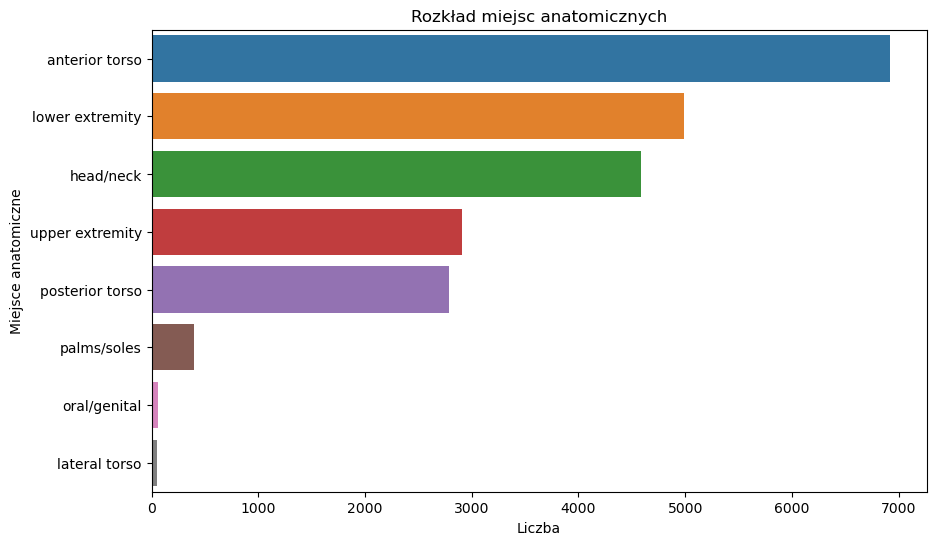

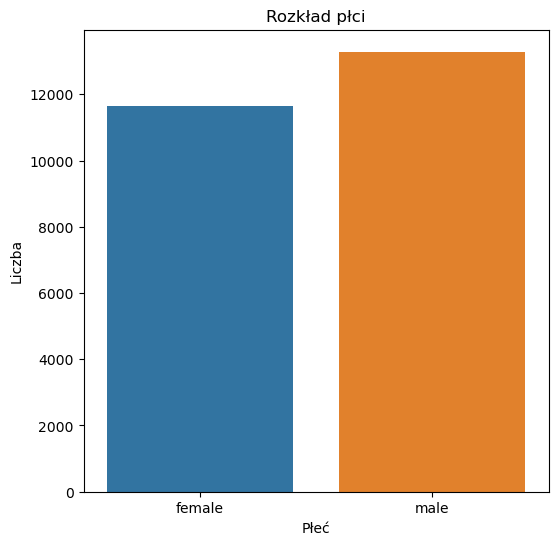

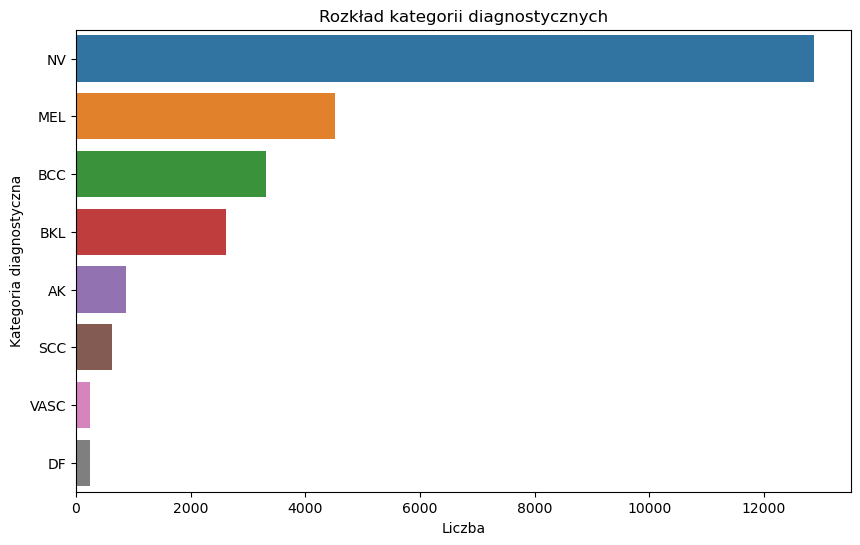

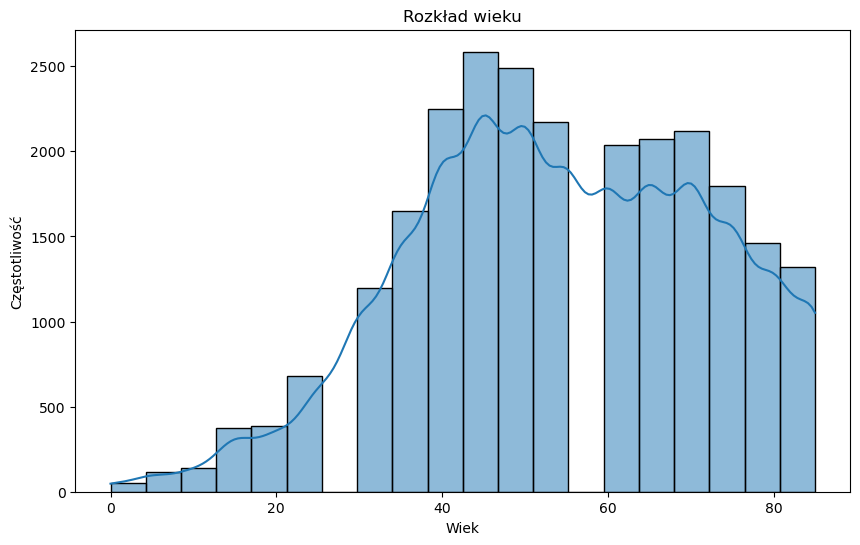

In [37]:
 #Wizualizacja rozkładu miejsc anatomicznych
plt.figure(figsize=(10,6))
sns.countplot(data=data, y='anatom_site_general', order=data['anatom_site_general'].value_counts().index)
plt.title('Rozkład miejsc anatomicznych')
plt.xlabel('Liczba')
plt.ylabel('Miejsce anatomiczne')
plt.show()

 #Wizualizacja rozkładu płci
plt.figure(figsize=(6,6))
sns.countplot(data=data, x='sex')
plt.title('Rozkład płci')
plt.xlabel('Płeć')
plt.ylabel('Liczba')
plt.show()

# Wizualizacja rozkładu kategorii diagnostycznych
plt.figure(figsize=(10,6))
sns.countplot(data=data, y='diagnostic', order=data['diagnostic'].value_counts().index)
plt.title('Rozkład kategorii diagnostycznych')
plt.xlabel('Liczba')
plt.ylabel('Kategoria diagnostyczna')
plt.show()

# Wizualizacja rozkładu wieku
plt.figure(figsize=(10,6))
sns.histplot(data['age_approx'].dropna(), bins=20, kde=True)
plt.title('Rozkład wieku')
plt.xlabel('Wiek')
plt.ylabel('Częstotliwość')
plt.show()


<Figure size 640x480 with 0 Axes>

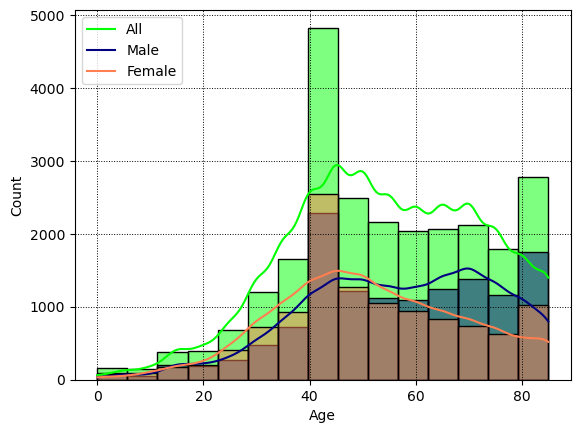

<Figure size 640x480 with 0 Axes>

In [44]:
 
male = data[data['sex'] == 'male']
female = data[data['sex'] == 'female']


kde = True

 
sns.histplot(data['age_approx'], color="lime", label='All', kde=kde, bins=15)
sns.histplot(male['age_approx'], color="navy", label='Male', kde=kde, bins=15)
sns.histplot(female['age_approx'], color="coral", label='Female', kde=kde, bins=15)

plt.grid(color='black', linestyle='dotted', linewidth=0.7)


plt.xlabel("Age")

plt.legend(['All', 'Male', 'Female'], loc='upper left')

plt.figure()


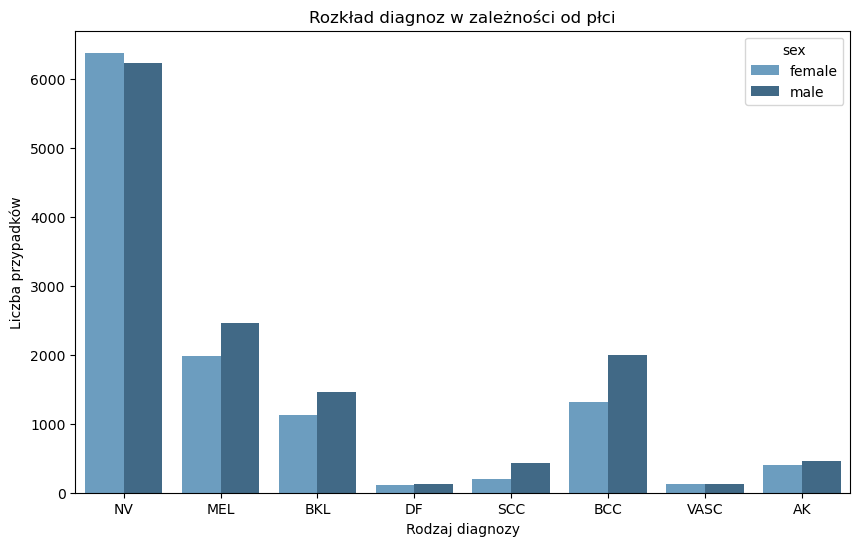

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x="diagnostic", hue="sex", data=data, palette="Blues_d")


plt.title('Rozkład diagnoz w zależności od płci')
plt.xlabel('Rodzaj diagnozy')
plt.ylabel('Liczba przypadków')

plt.show()


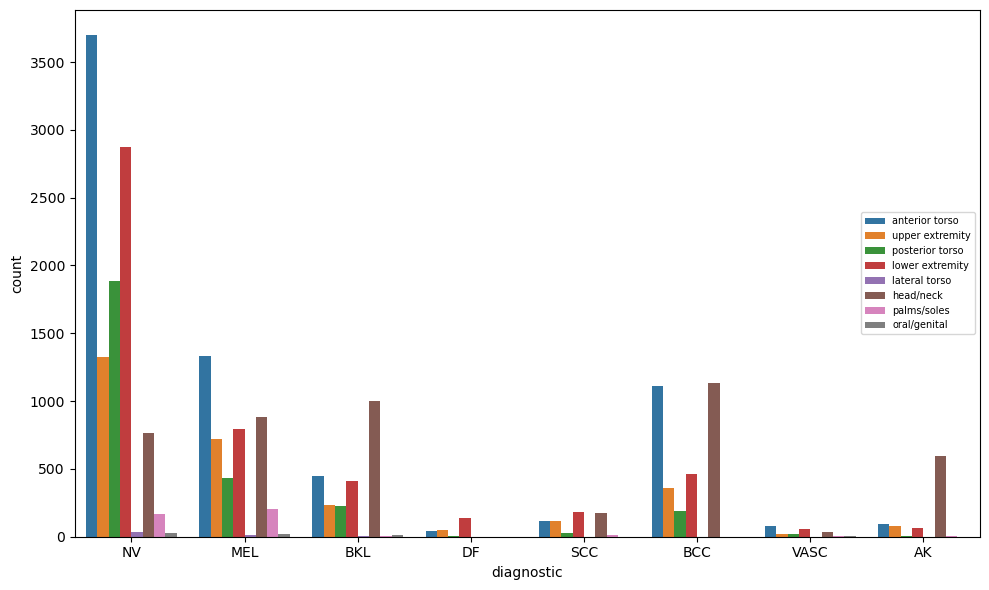

In [49]:

plt.figure(figsize=(10, 6))
sns.countplot(x="diagnostic", hue="anatom_site_general", data=data)

plt.legend(loc='right', prop={'size': 7})

plt.tight_layout()

plt.show()

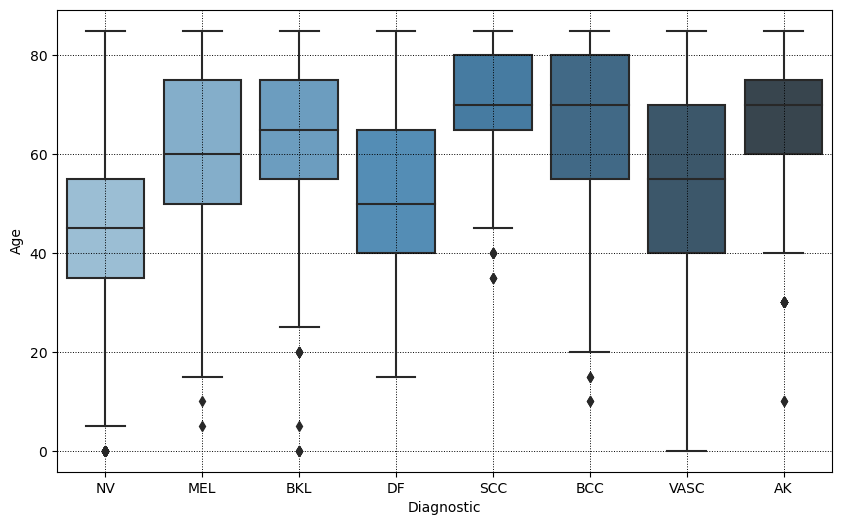

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(y='age_approx', x='diagnostic', data=data, palette="Blues_d")

plt.grid(color='black', linestyle='dotted', linewidth=0.7)

plt.xlabel("Diagnostic")
plt.ylabel("Age")

plt.show()
